In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from src.wrapped import Wrapped
from src.analysesV02 import Analytics
from src.trainV02 import TrainModels

/home/ubuntu/.cache/pypoetry/virtualenvs/model-52rUI7Ti-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Avaliando Resultados Preliminares

In [2]:
ac = Analytics()
tm = TrainModels()
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

## Importando resultados Preliminares

In [3]:
# percusão
xgb_percusao    = wp.load_data('resultados_parametros_percusao_XGBoost')
histgb_percusao = wp.load_data('resultados_parametros_percusao_histGB')
rf_percusao     = wp.load_data('resultados_parametros_percusao_random_forest')

# aerofone
histgb_aerofone = wp.load_data('resultados_parametros_aerofone_histGB')
xgb_aerofone    = wp.load_data('resultados_parametros_aerofone_XGBoost')
rf_aerofone     = wp.load_data('resultados_parametros_aerofone_random_forest')

# corda
histgb_corda = wp.load_data('resultados_parametros_corda_histGB')
xgb_corda    = wp.load_data('resultados_parametros_corda_XGBoost')
rf_corda     = wp.load_data('resultados_parametros_corda_random_forest')

# sopro
xgb_sopro    = wp.load_data('resultados_parametros_sopro_XGBoost')
histgb_sopro = wp.load_data('resultados_parametros_sopro_histGB')
rf_sopro     = wp.load_data('resultados_parametros_sopro_random_forest')

- crinado algumas colunas de indentificação

In [4]:
rf_sopro["base"] = 'sopro'
rf_sopro["model"] = 'Random Forest'
xgb_sopro["base"] = 'sopro'
xgb_sopro["model"] = 'XGBoost'
histgb_sopro["base"] = 'sopro'
histgb_sopro["model"] = 'HistGradientBoost'

rf_corda["base"] = 'corda'
rf_corda["model"] = 'Random Forest'
xgb_corda["base"] = 'corda'
xgb_corda["model"] = 'XGBoost'
histgb_corda["base"] = 'corda'
histgb_corda["model"] = 'HistGradientBoost'

rf_percusao["base"] = 'percusao'
rf_percusao["model"] = 'Random Forest'
xgb_percusao["base"] = 'percusao'
xgb_percusao["model"] = 'XGBoost'
histgb_percusao["base"] = 'percusao'
histgb_percusao["model"] = 'HistGradientBoost'

rf_aerofone["base"] = 'aerofone'
rf_aerofone["model"] = 'Random Forest'
xgb_aerofone["base"] = 'aerofone'
xgb_aerofone["model"] = 'XGBoost'
histgb_aerofone["base"] = 'aerofone'
histgb_aerofone["model"] = 'HistGradientBoost'

## Percusão

In [6]:
# rf_percusao.nlargest(10, "accuracy_models")

- HistGradiente Boost

In [7]:
histgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
10,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost
41,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost
34,manhattan,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",76.751652,percusao,HistGradientBoost
50,minkowski,auto,11,"{'loss': 'log_loss', 'max_bins': 155, 'max_dep...",76.751144,percusao,HistGradientBoost
21,euclidean,brute,5,"{'loss': 'log_loss', 'max_bins': 118, 'max_dep...",76.681495,percusao,HistGradientBoost
44,minkowski,kd_tree,9,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",76.679969,percusao,HistGradientBoost
52,manhattan,ball_tree,11,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",76.679715,percusao,HistGradientBoost
59,minkowski,brute,11,"{'loss': 'categorical_crossentropy', 'max_bins...",76.609304,percusao,HistGradientBoost
53,minkowski,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",76.608541,percusao,HistGradientBoost
1,manhattan,auto,3,"{'loss': 'auto', 'max_bins': 127, 'max_depth':...",76.537875,percusao,HistGradientBoost


- XGBoost

In [8]:
xgb_percusao.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
19,manhattan,kd_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",76.466701,percusao,XGBoost
58,manhattan,brute,11,"{'eta': 0.019930058172093756, 'gamma': 0, 'lea...",76.322827,percusao,XGBoost
53,minkowski,ball_tree,11,"{'eta': 0.1831915872334425, 'gamma': 1, 'learn...",76.322318,percusao,XGBoost
9,euclidean,brute,3,"{'eta': 0.13555691781885126, 'gamma': 2, 'lear...",76.179969,percusao,XGBoost
1,manhattan,auto,3,"{'eta': 0.1540962207132831, 'gamma': 1, 'learn...",76.110574,percusao,XGBoost
50,minkowski,auto,11,"{'eta': 0.1914349602093345, 'gamma': 3, 'learn...",76.109558,percusao,XGBoost
48,euclidean,auto,11,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.3...",76.038383,percusao,XGBoost
15,euclidean,ball_tree,5,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.32...",76.037367,percusao,XGBoost
42,euclidean,kd_tree,9,"{'eta': 0.04145008878839695, 'gamma': 4, 'lear...",76.037112,percusao,XGBoost
57,euclidean,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.13...",76.036604,percusao,XGBoost


In [30]:
results_percusao = pd.concat([histgb_percusao, xgb_percusao])
results_percusao.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
10,manhattan,brute,3,"{'loss': 'categorical_crossentropy', 'max_bins...",76.824098,percusao,HistGradientBoost
41,minkowski,ball_tree,9,"{'loss': 'categorical_crossentropy', 'max_bins...",76.752415,percusao,HistGradientBoost


## Aerofone 

In [11]:
# rf_aerofone.nlargest(10, "accuracy_models")

In [12]:
histgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
6,euclidean,kd_tree,3,"{'loss': 'auto', 'max_bins': 149, 'max_depth':...",75.301587,aerofone,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost
37,manhattan,auto,9,"{'loss': 'log_loss', 'max_bins': 250, 'max_dep...",74.857143,aerofone,HistGradientBoost
49,manhattan,auto,11,"{'loss': 'auto', 'max_bins': 236, 'max_depth':...",74.730159,aerofone,HistGradientBoost
58,manhattan,brute,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.730159,aerofone,HistGradientBoost
39,euclidean,ball_tree,9,"{'loss': 'auto', 'max_bins': 248, 'max_depth':...",74.666667,aerofone,HistGradientBoost
51,euclidean,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.603175,aerofone,HistGradientBoost
53,minkowski,ball_tree,11,"{'loss': 'categorical_crossentropy', 'max_bins...",74.603175,aerofone,HistGradientBoost
23,minkowski,brute,5,"{'loss': 'categorical_crossentropy', 'max_bins...",74.557565,aerofone,HistGradientBoost
33,euclidean,brute,7,"{'loss': 'log_loss', 'max_bins': 133, 'max_dep...",74.556560,aerofone,HistGradientBoost


In [13]:
xgb_aerofone.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
7,manhattan,kd_tree,3,"{'eta': 0.05463933264807607, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost
11,minkowski,brute,3,"{'eta': 0.06946799637707525, 'gamma': 1, 'lear...",74.920635,aerofone,XGBoost
5,minkowski,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.13...",74.730159,aerofone,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.17...",74.603175,aerofone,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.2...",74.603175,aerofone,XGBoost
51,euclidean,ball_tree,11,"{'eta': 0.12810164295768733, 'gamma': 3, 'lear...",74.539683,aerofone,XGBoost
2,minkowski,auto,3,"{'eta': 0.04242709684163053, 'gamma': 2, 'lear...",74.476190,aerofone,XGBoost
48,euclidean,auto,11,"{'eta': 0.10158074096378887, 'gamma': 0, 'lear...",74.476190,aerofone,XGBoost
59,minkowski,brute,11,"{'eta': 0.04441713098337428, 'gamma': 0, 'lear...",74.412698,aerofone,XGBoost
29,minkowski,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.34...",74.366486,aerofone,XGBoost


- Dois melhores Resultados Gerais

In [26]:
results_aerofone = pd.concat([histgb_aerofone, xgb_aerofone])
results_aerofone.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
6,euclidean,kd_tree,3,"{'loss': 'auto', 'max_bins': 149, 'max_depth':...",75.301587,aerofone,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'log_loss', 'max_bins': 191, 'max_dep...",74.920635,aerofone,HistGradientBoost


## Corda

In [15]:
histgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
21,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost
18,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost
26,minkowski,auto,7,"{'loss': 'auto', 'max_bins': 215, 'max_depth':...",54.516169,corda,HistGradientBoost
40,manhattan,ball_tree,9,"{'loss': 'log_loss', 'max_bins': 108, 'max_dep...",54.516169,corda,HistGradientBoost
30,euclidean,kd_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",54.435034,corda,HistGradientBoost
44,minkowski,kd_tree,9,"{'loss': 'auto', 'max_bins': 204, 'max_depth':...",54.394466,corda,HistGradientBoost
35,minkowski,brute,7,"{'loss': 'categorical_crossentropy', 'max_bins...",54.394052,corda,HistGradientBoost
20,minkowski,kd_tree,5,"{'loss': 'auto', 'max_bins': 183, 'max_depth':...",54.393638,corda,HistGradientBoost
15,euclidean,ball_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.353650,corda,HistGradientBoost
33,euclidean,brute,7,"{'loss': 'log_loss', 'max_bins': 124, 'max_dep...",54.312006,corda,HistGradientBoost


In [16]:
xgb_corda.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
23,minkowski,brute,5,"{'eta': 0.03984118437430785, 'gamma': 0, 'lear...",54.638617,corda,XGBoost
2,minkowski,auto,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",54.516335,corda,XGBoost
44,minkowski,kd_tree,9,"{'eta': 0.0429247022905369, 'gamma': 0, 'learn...",54.516086,corda,XGBoost
17,minkowski,ball_tree,5,"{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.0...",54.353485,corda,XGBoost
36,euclidean,auto,9,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.21...",54.313248,corda,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.15...",54.232030,corda,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.026649962074560878, 'gamma': 0, 'lea...",54.231533,corda,XGBoost
20,minkowski,kd_tree,5,"{'eta': 0.01, 'gamma': 0, 'learning_rate': 0.1...",54.150895,corda,XGBoost
13,manhattan,auto,5,"{'eta': 0.01592774025845548, 'gamma': 1, 'lear...",54.150233,corda,XGBoost
21,euclidean,brute,5,"{'eta': 0.0765709293152808, 'gamma': 0, 'learn...",54.150067,corda,XGBoost


In [17]:
# rf_corda.nlargest(10, "accuracy_models")

- Dois melhores Resultados Gerais

In [25]:
results_corda = pd.concat([histgb_corda, xgb_corda])
results_corda.nlargest(2, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
21,euclidean,brute,5,"{'loss': 'auto', 'max_bins': 250, 'max_depth':...",54.882851,corda,HistGradientBoost
18,euclidean,kd_tree,5,"{'loss': 'categorical_crossentropy', 'max_bins...",54.719835,corda,HistGradientBoost


## Sopro

- Random Forest

In [20]:
# rf_sopro.nlargest(10, "accuracy_models")

- XGBoost

In [21]:
xgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
28,manhattan,ball_tree,7,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.651235,sopro,XGBoost
18,euclidean,kd_tree,5,"{'eta': 0.017982161175003848, 'gamma': 0, 'lea...",72.513304,sopro,XGBoost
3,euclidean,ball_tree,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.06...",72.444338,sopro,XGBoost
9,euclidean,brute,3,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.10...",72.375373,sopro,XGBoost
31,manhattan,kd_tree,7,"{'eta': 0.1295369560690937, 'gamma': 0, 'learn...",72.375373,sopro,XGBoost
7,manhattan,kd_tree,3,"{'eta': 0.17229939618061413, 'gamma': 0, 'lear...",72.237442,sopro,XGBoost
23,minkowski,brute,5,"{'eta': 0.06654379049558337, 'gamma': 0, 'lear...",72.168715,sopro,XGBoost
30,euclidean,kd_tree,7,"{'eta': 0.026794319404936817, 'gamma': 0, 'lea...",72.168238,sopro,XGBoost
49,manhattan,auto,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.14...",72.167999,sopro,XGBoost
52,manhattan,ball_tree,11,"{'eta': 0.06806298162034588, 'gamma': 2, 'lear...",72.100465,sopro,XGBoost


- HistGradrientBoost

In [22]:
histgb_sopro.nlargest(10, "accuracy_models")

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model
5,minkowski,ball_tree,3,"{'loss': 'log_loss', 'max_bins': 231, 'max_dep...",72.513065,sopro,HistGradientBoost
2,minkowski,auto,3,"{'loss': 'auto', 'max_bins': 205, 'max_depth':...",72.445293,sopro,HistGradientBoost
8,minkowski,kd_tree,3,"{'loss': 'categorical_crossentropy', 'max_bins...",72.306646,sopro,HistGradientBoost
27,euclidean,ball_tree,7,"{'loss': 'categorical_crossentropy', 'max_bins...",72.306407,sopro,HistGradientBoost
3,euclidean,ball_tree,3,"{'loss': 'auto', 'max_bins': 213, 'max_depth':...",72.168954,sopro,HistGradientBoost
6,euclidean,kd_tree,3,"{'loss': 'categorical_crossentropy', 'max_bins...",72.165851,sopro,HistGradientBoost
29,minkowski,ball_tree,7,"{'loss': 'log_loss', 'max_bins': 100, 'max_dep...",72.099749,sopro,HistGradientBoost
9,euclidean,brute,3,"{'loss': 'auto', 'max_bins': 105, 'max_depth':...",72.099511,sopro,HistGradientBoost
11,minkowski,brute,3,"{'loss': 'log_loss', 'max_bins': 185, 'max_dep...",72.099034,sopro,HistGradientBoost
15,euclidean,ball_tree,5,"{'loss': 'auto', 'max_bins': 100, 'max_depth':...",72.098795,sopro,HistGradientBoost


- Dois melhores Resultados Gerais

In [23]:
# results_sopro = pd.concat([histgb_sopro, xgb_sopro, rf_sopro])
# results_sopro.nlargest(10, "accuracy_models")

# Avaliando os dois melhores Resultados Preliminares de cada Base

- Concatenando os resultados

In [26]:
results_geral = pd.concat([
    results_aerofone.nlargest(2, "accuracy_models"),
    results_corda.nlargest(2, "accuracy_models"),
    results_percusao.nlargest(2, "accuracy_models"),
    results_sopro.nlargest(2, "accuracy_models")
]).reset_index().drop(columns=["index"])

results_geral["name_model_test"] = ["Model-01", "Model-02", "Model-01", "Model-02" , "Model-01", "Model-02", "Model-01", "Model-02"]

results_geral

,metric_detected_outiler,algorithm_detected_outiler,neighbors_detected_outiler,parametos_models,accuracy_models,base,model,name_model_test
0,minkowski,kd_tree,11,"{'loss': 'log_loss', 'max_bins': 105, 'max_dep...",76.000000,aerofone,HistGradientBoost,Model-01
1,minkowski,auto,11,"{'loss': 'auto', 'max_bins': 132, 'max_depth':...",74.857143,aerofone,HistGradientBoost,Model-02
2,minkowski,auto,9,"{'bootstrap': True, 'criterion': 'gini', 'max_...",54.740741,corda,Random Forest,Model-01
3,manhattan,auto,5,"{'eta': 0.027861238825289514, 'gamma': 1, 'lea...",54.740741,corda,XGBoost,Model-02
4,manhattan,brute,11,"{'eta': 0.2, 'gamma': 0, 'learning_rate': 0.28...",78.830645,percusao,XGBoost,Model-01
5,manhattan,ball_tree,11,"{'eta': 0.1940450475269715, 'gamma': 0, 'learn...",78.165323,percusao,XGBoost,Model-02
6,manhattan,brute,7,"{'bootstrap': False, 'criterion': 'gini', 'max...",75.795455,sopro,Random Forest,Model-01
7,manhattan,auto,7,"{'bootstrap': False, 'criterion': 'entropy', '...",74.564394,sopro,Random Forest,Model-02


- Importando base de instrumentos para avaliação de modelos

In [24]:
# dataframe
df = wp.load_data('df_instrumentos_features_selecionadas').drop(columns=['file_name'])

# dataframes por instrumentos
inst_corda = ["cello", "guitar", "violin", "bass", "banjo", "mandolin", "ukulele"]
inst_percusao = ["mallet_percussion", "drums", "cymbals"]
inst_sopro = ["clarinet", "trombone", "flute", "trumpet", "saxophone"]
inst_aerofone = ["accordion", "organ", "piano"] 

df_inst_aerofone = df[df['instrumento'].isin(inst_aerofone)]
df_inst_sopro = df[df['instrumento'].isin(inst_sopro)]
df_inst_corda = df[df['instrumento'].isin(inst_corda)]
df_inst_percusao = df[df['instrumento'].isin(inst_percusao)]

## Aerofone 

### Model 1

- Detected outilers

In [28]:
outlier_model_1_aerofone = ac.detected_outilers_knn(metric="minkowski", algorithm="kd_tree", neighbors=11, dataframe=df_inst_aerofone)

algorithm parameter is deprecated and will be removed in version 0.7.6. By default, ball_tree will be used.


- Removed outilers

In [29]:
df_inst_aerofone_01 = ac.show_inlers(dataframe=df_inst_aerofone, pred=outlier_model_1_aerofone["predictions"])
df_inst_aerofone_01

,tonnetz0,tonnetz1,chroma1,chroma2,chroma3,chroma4,chroma5,chroma6,chroma7,mfcc0,...,spectral_band3,spectral_band4,spectral_centroid,spectral_onset,spectral_rolloff,spectogram,mel_spectogram,zero_crossing_rate,zero_crossing,instrumento
1,0.084643,-0.035337,0.175587,0.429345,0.840043,0.384524,0.282545,0.346341,0.482365,-90.556145,...,3038.064172,3516.595715,2385.271420,1.360742,5225.124166,-46.575737,-59.323132,0.112181,24785,accordion
2,-0.030127,0.082404,0.453814,0.219808,0.228484,0.446050,0.178916,0.250981,0.327460,-106.124260,...,2735.690428,3256.491175,2069.850731,1.343197,4287.155824,-56.276707,-71.512909,0.096007,21230,accordion
4,-0.049096,-0.029067,0.484400,0.334572,0.441629,0.679485,0.382958,0.326033,0.205775,-226.263824,...,2223.101638,2883.225952,1251.374287,1.339527,2263.034730,-62.227947,-78.196365,0.059804,13214,accordion
5,-0.180964,0.569503,0.371429,0.329753,0.127768,0.165817,0.210350,0.864152,0.316520,-139.586807,...,2394.684608,3055.207315,1213.792172,0.863256,2477.767229,-66.244644,-79.955254,0.051793,11451,accordion
6,0.028753,-0.014921,0.348190,0.591767,0.580526,0.252980,0.178806,0.176829,0.146679,-72.816124,...,2952.117165,3419.107693,2306.068426,1.584272,5015.487692,-43.456684,-54.108776,0.081870,18136,accordion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,0.306987,0.197302,0.181270,0.482163,0.806090,0.410171,0.182062,0.128068,0.223802,-208.045074,...,1277.163672,1710.803257,821.680671,0.769584,1623.308746,-52.423000,-75.093781,0.038042,8414,piano
5984,0.339596,0.193580,0.309043,0.115449,0.066983,0.121548,0.543438,0.246675,0.126754,-359.998535,...,1681.556710,2431.230598,704.896231,0.654192,1007.089425,-73.745857,-80.000000,0.042257,9343,piano
5985,0.022141,0.249860,0.019285,0.019074,0.026441,0.062063,0.285675,0.762290,0.256367,-342.691559,...,1672.357525,2406.899185,647.666659,0.788650,1045.659338,-9.425838,-39.180683,0.026027,5747,piano
5986,-0.038987,0.185848,0.182197,0.123432,0.274012,0.223736,0.119671,0.259500,0.083546,-192.736328,...,1112.070824,1570.408078,1094.419047,1.140904,1788.779671,-25.643265,-72.219749,0.081838,18093,piano


- Train model


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5) do Fold 0: 0.7174603174603175


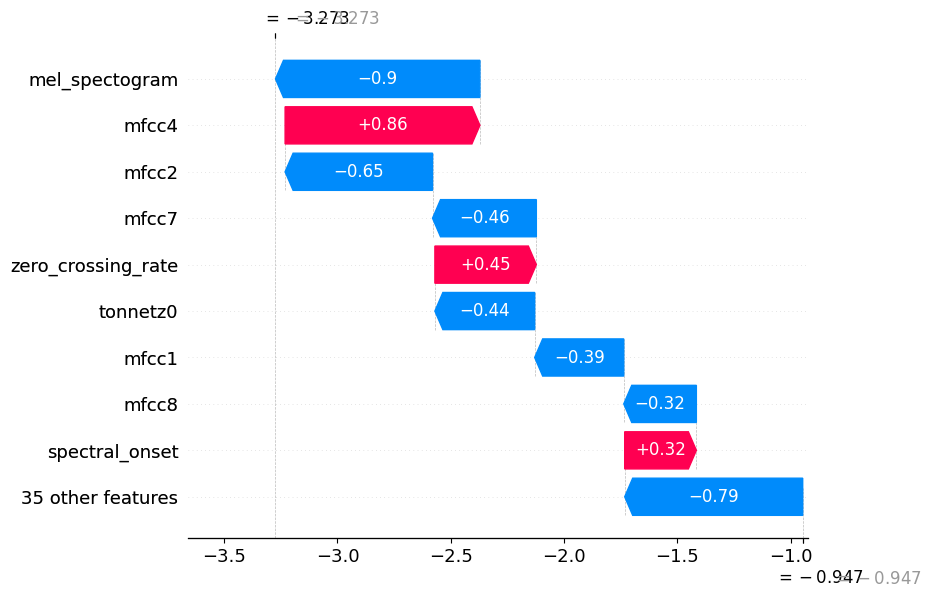

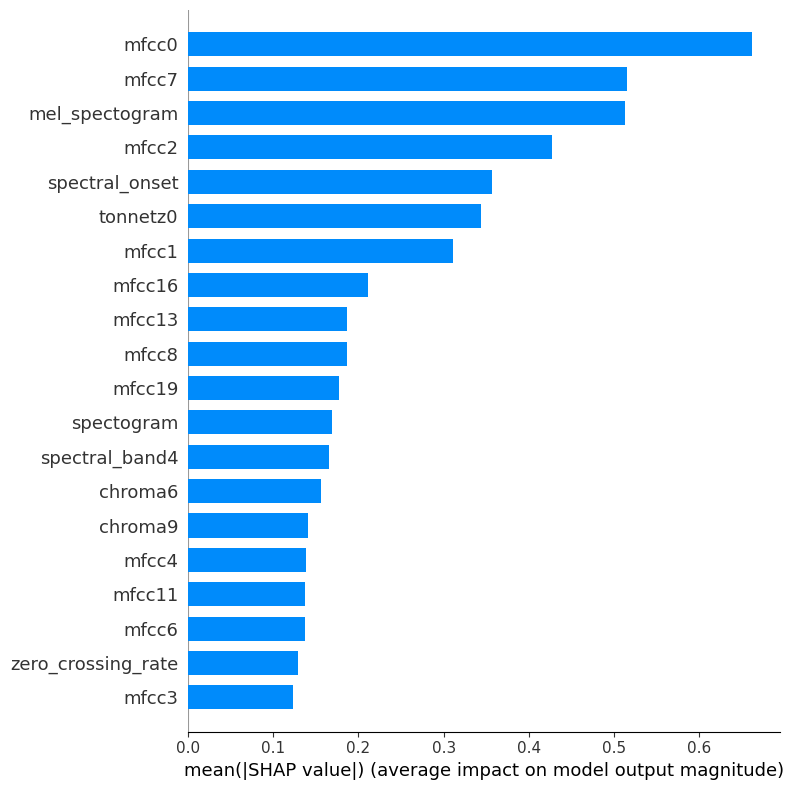

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


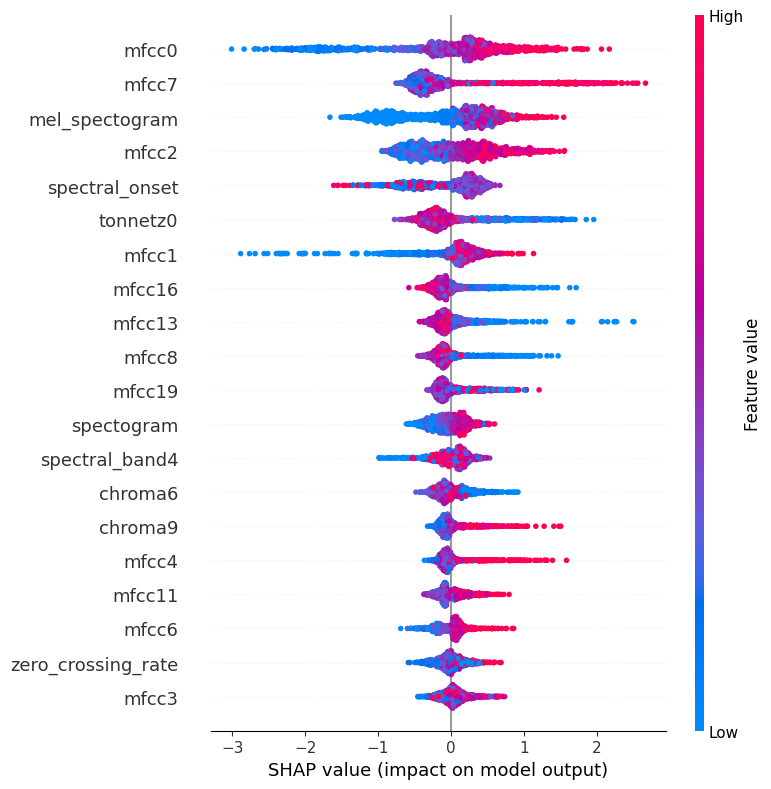

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5) do Fold 1: 0.7396825396825397


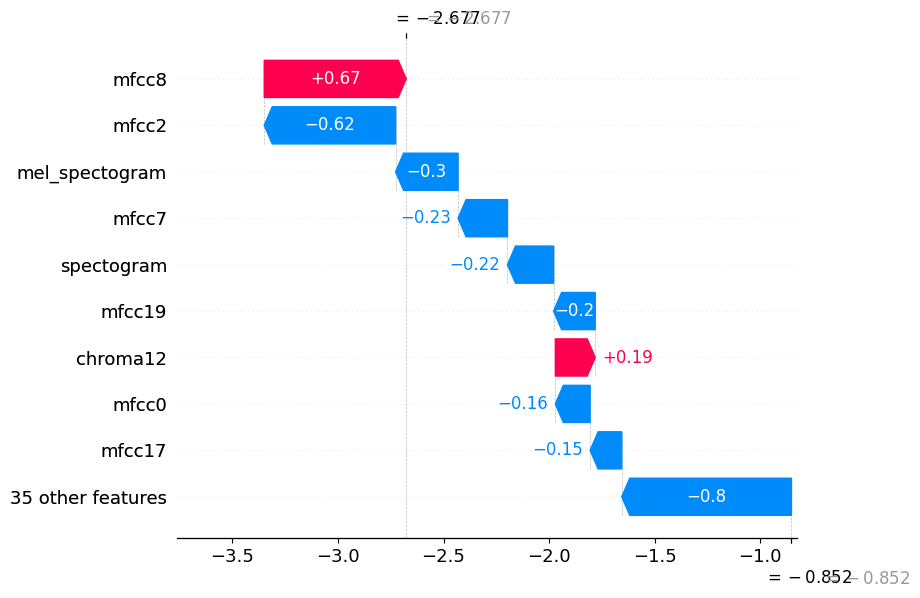

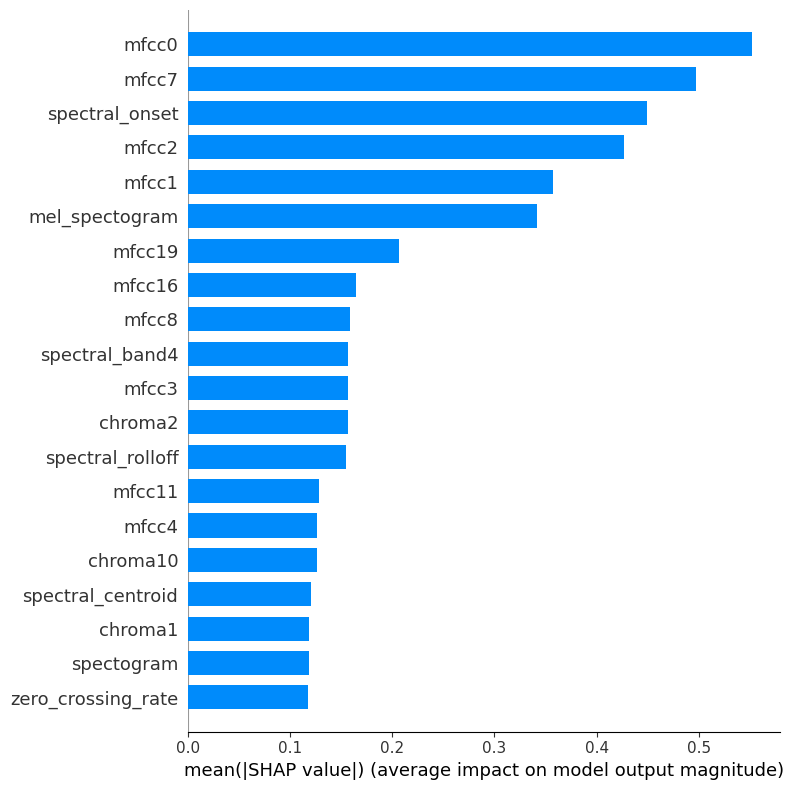

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


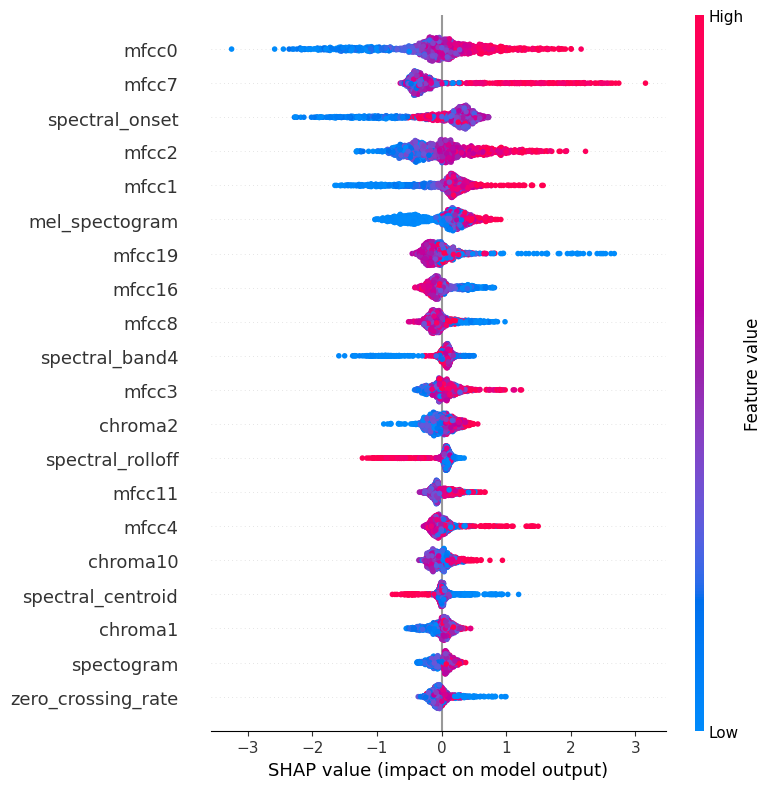

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5) do Fold 2: 0.7301587301587301


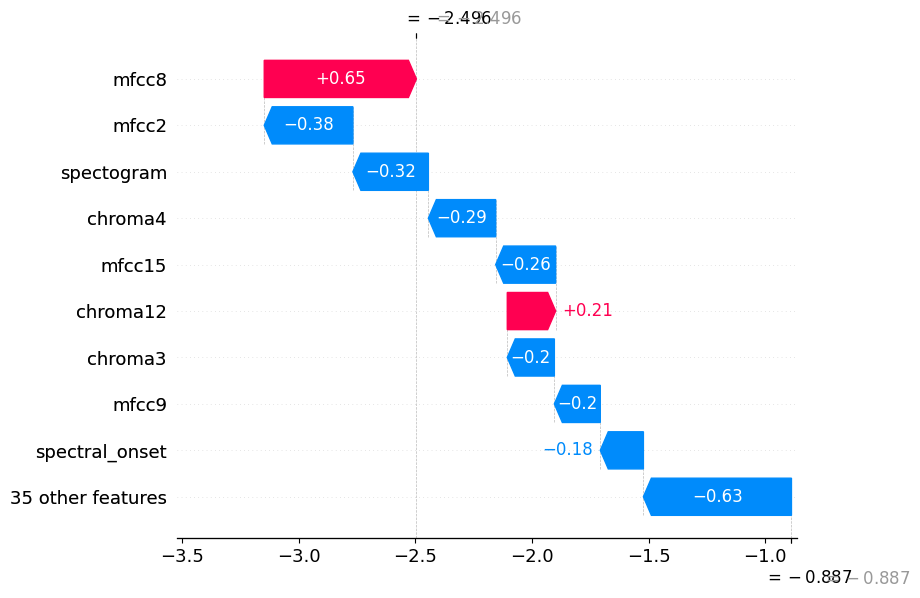

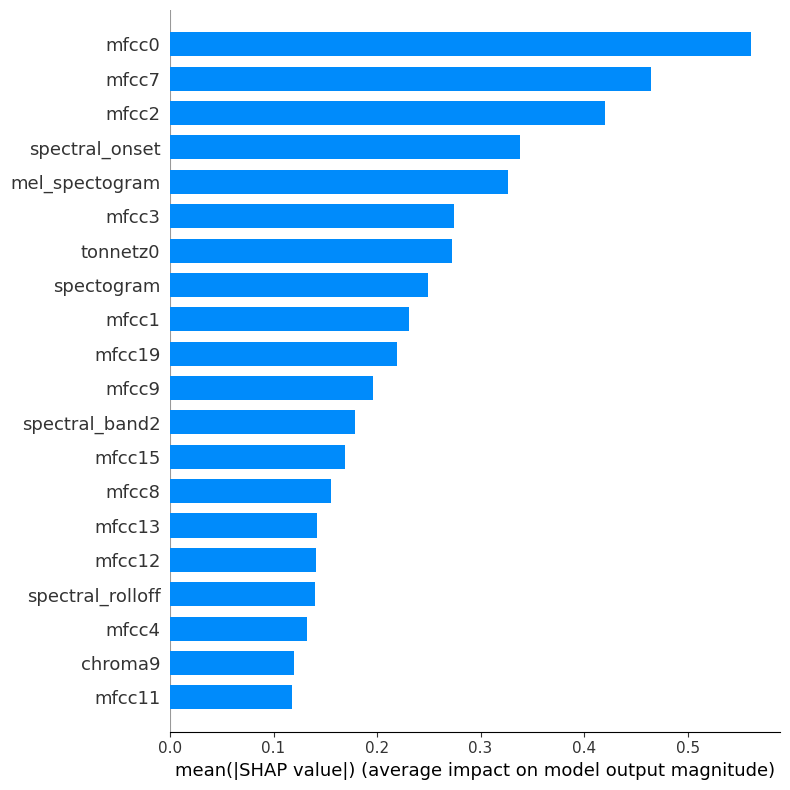

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


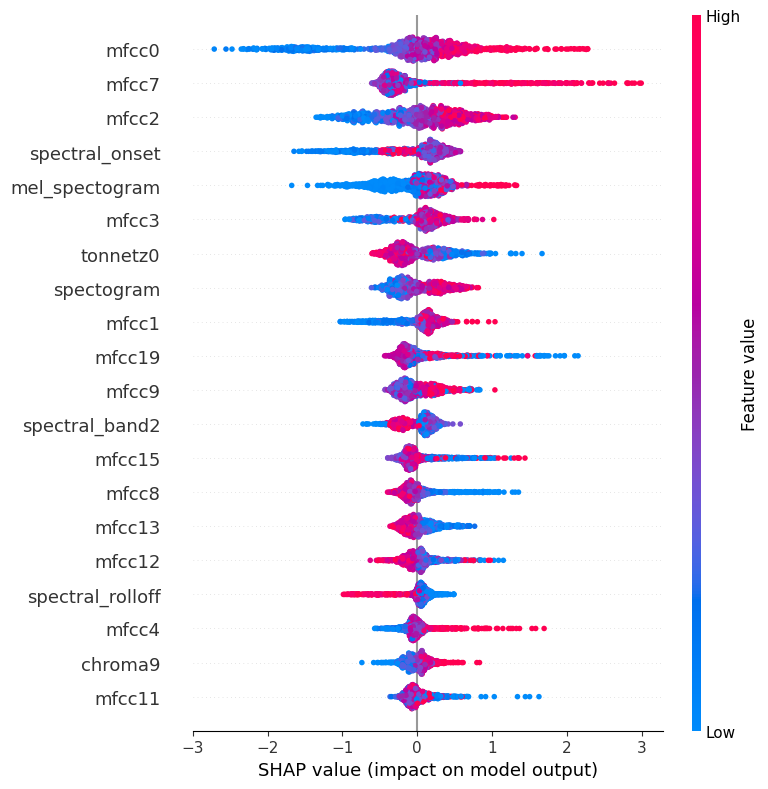

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5) do Fold 3: 0.6952380952380952


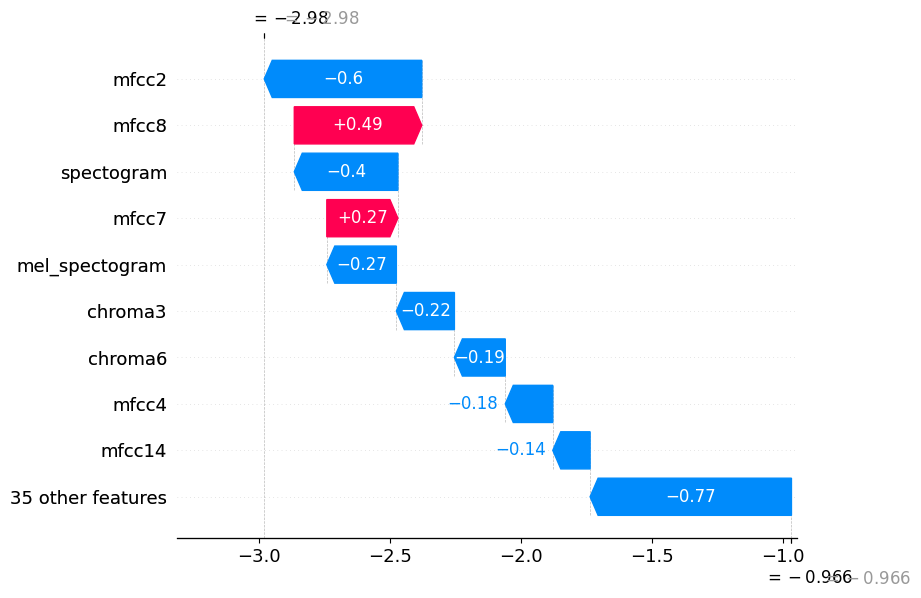

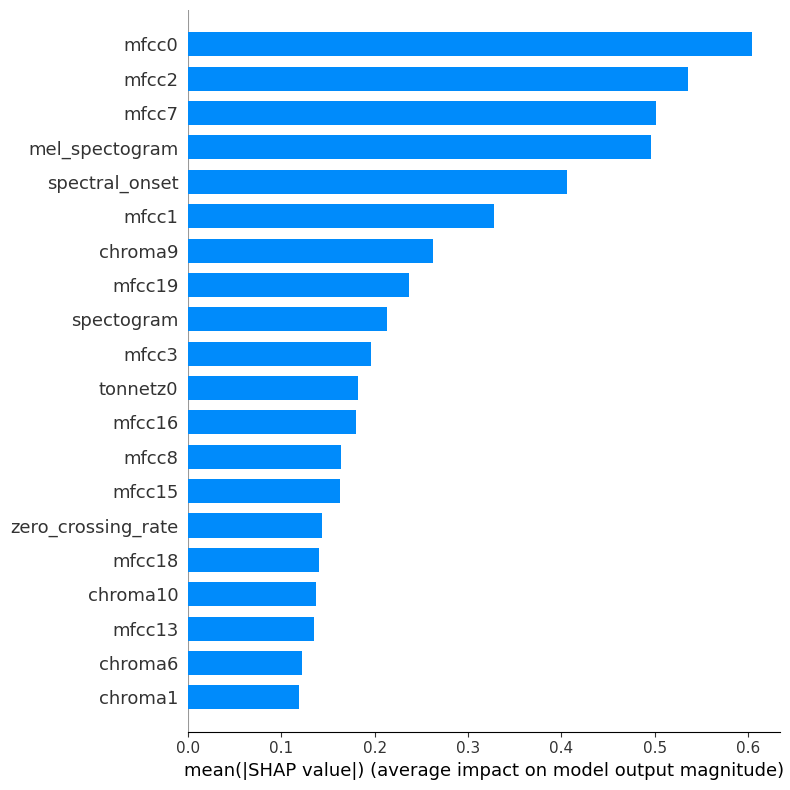

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


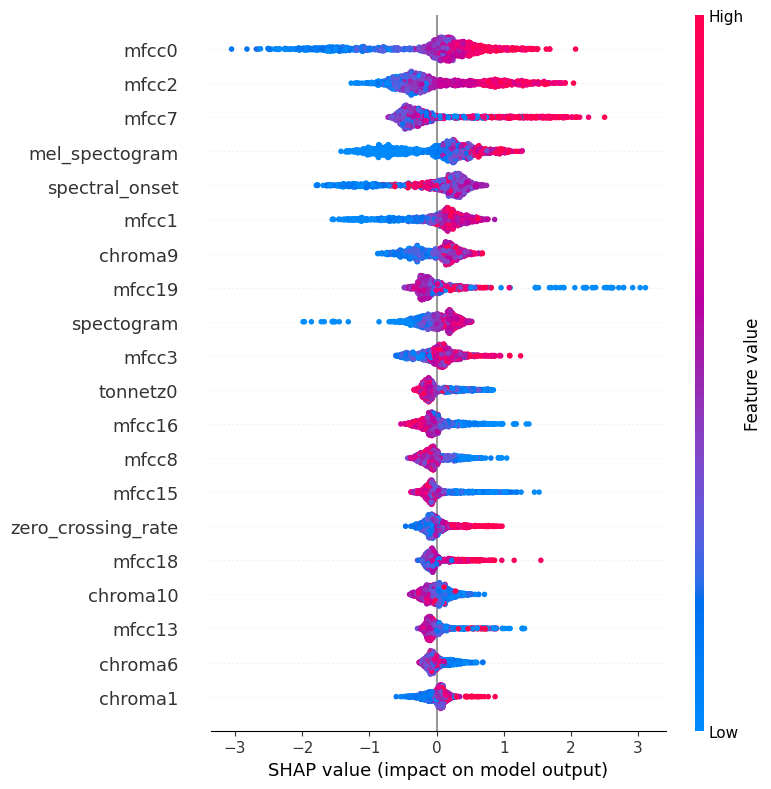

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Tamanho base: 1575 - Acuracia do modelo HistGradientBoostingClassifier(max_bins=105, max_depth=19, min_samples_leaf=5) do Fold 4: 0.7619047619047619


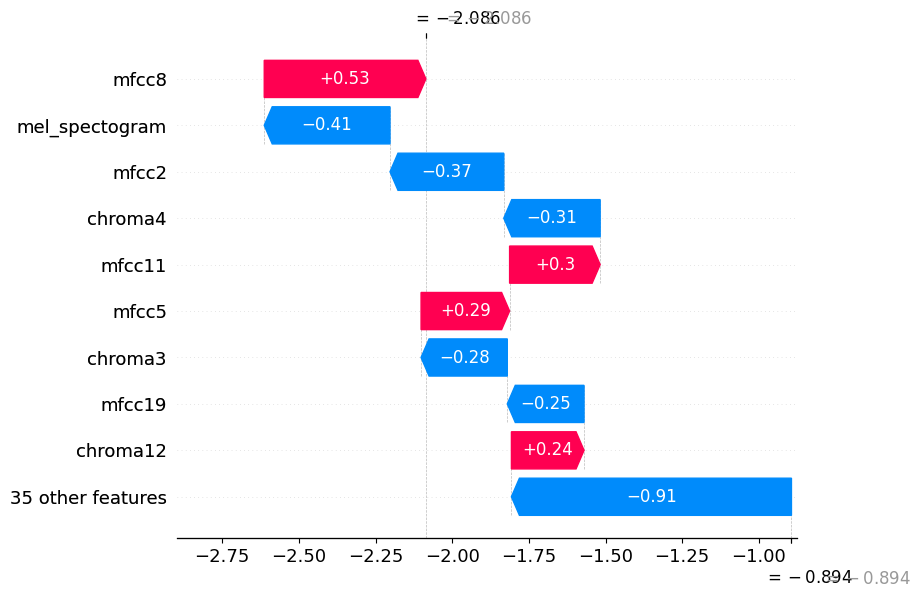

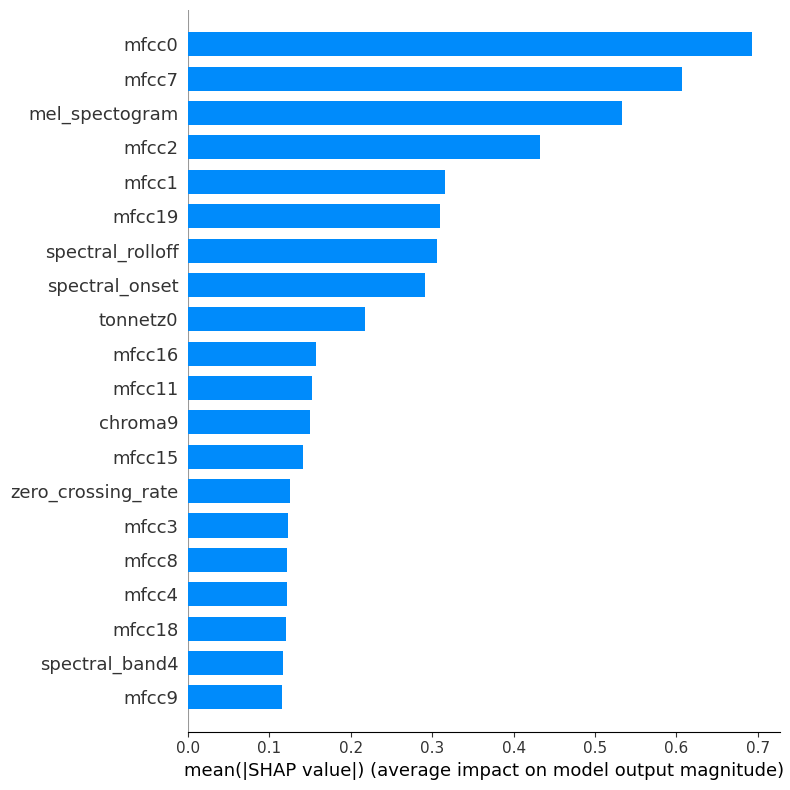

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


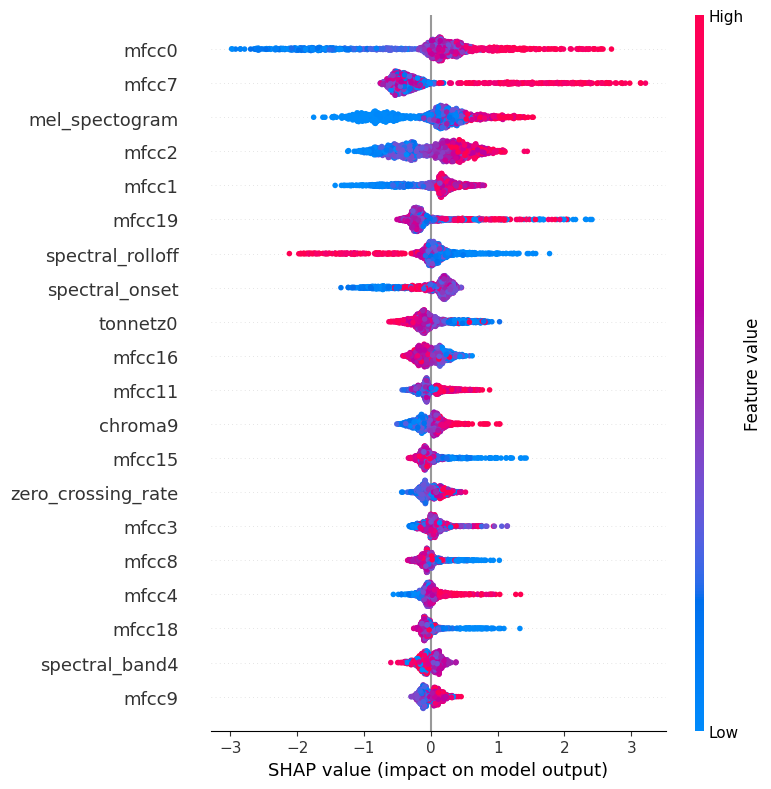

{'accuracy_mean': 72.88888888888889,
 'std': 0.02223129066668139,
 'predictions': array([0., 0., 0., ..., 2., 2., 2.]),
 'y_validate': array([0., 0., 0., ..., 2., 2., 2.]),
 'predictions_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'piano'], dtype=object),
 'y_validate_cat': array(['accordion', 'accordion', 'accordion', ..., 'piano', 'piano',
        'piano'], dtype=object)}

In [30]:
model = HistGradientBoostingClassifier(
    loss= 'log_loss',
    max_bins=105,
    max_depth=19,
    min_samples_leaf=5
)

results_aerofone_1 = tm.cross_validate_balancead(k=5, model=model, y_pred = "instrumento", dataframe=df_inst_aerofone_01, shap=True)
results_aerofone_1

In [31]:
df_inst_aerofone_01.labels.unique()

array([0, 1, 2])

In [32]:
df_inst_aerofone_01[["labels", "instrumento"]].query("instrumento == 'piano'")

,labels,instrumento
5360,2,piano
5361,2,piano
5362,2,piano
5363,2,piano
5364,2,piano
...,...,...
5983,2,piano
5984,2,piano
5985,2,piano
5986,2,piano


- Matriz de Confusão

In [41]:
np.unique(results_aerofone_1["predictions_cat"])

array(['accordion', 'organ', 'piano'], dtype=object)

<Axes: title={'center': 'Matriz confusão modelo 1 aerofone'}>

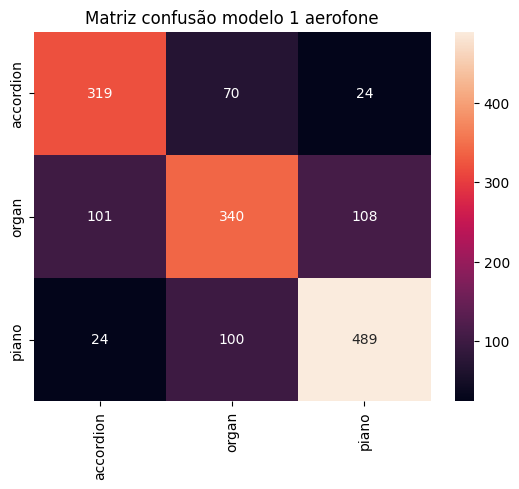

In [42]:
ac.matriz_confusion(
    results_aerofone_1['y_validate'],
    results_aerofone_1['predictions'],
    labels=np.unique(results_aerofone_1["predictions_cat"]),
    title='Matriz confusão modelo 1 aerofone',
    rename_labels=True
)

### Model 2

- Detected outilers

In [ ]:
outlier_model_2_aerofone = ac.detected_outilers_knn(metric="minkowski", algorithm="auto", neighbors=11, dataframe=df_inst_aerofone)

- Removed outilers

In [ ]:
df_inst_aerofone_02 = ac.show_inlers(dataframe=df_inst_aerofone, pred=outlier_model_2_aerofone["predictions"])
df_inst_aerofone_02

- Train model

In [ ]:
model = HistGradientBoostingClassifier(
    loss= 'auto',
    max_bins=132,
    max_depth=6,
    min_samples_leaf=5,
    random_state=42
)

results_2_aerofone = tm.cross_validate_balancead(k=5, model=model, y_pred = "instrumento", dataframe=df_inst_aerofone_02)
results_2_aerofone

- Matrix de confusão

In [ ]:
results_2_aerofone

In [ ]:
ac.matriz_confusion(
    results_2_aerofone['y_validate'],
    results_2_aerofone['predictions'],
    labels=df_inst_aerofone_02.predictions_cat.unique(),
    title='Matriz confusão modelo 2 aerofone',
    rename_labels=True
)

# Sopro

### Model 1

- Detected outilers

In [ ]:
outlier_model_1_sopro = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=7, dataframe=df_inst_sopro)

- Removed outilers

In [ ]:
df_inst_sopro_01 = ac.show_inlers(dataframe=df_inst_sopro, pred=outlier_model_1_sopro["predictions"])
df_inst_sopro_01

- Train model

In [ ]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "gini",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 202,
    random_state=42
)

results_1_sopro = tm.cross_validate_balancead(k=5, model=model, y_pred='instrumento', dataframe=df_inst_sopro_01, shap=True)
results_1_sopro

In [ ]:
df_inst_sopro_01

- Matriz de confusão

In [ ]:
ac.matriz_confusion(
    results_1_sopro['y_validate'],
    results_1_sopro['predictions'],
    labels=df_inst_sopro_01.predictions_cat.unique(),
    title='Matriz confusão modelo 1 sopro',
    rename_labels=True
)

## Model 2

- Detected outilers

In [ ]:
outlier_model_2_sopro = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=7, dataframe=df_inst_sopro)

- Removed outilers

In [ ]:
df_inst_sopro_02 = ac.show_outilers(dataframe=df_inst_sopro, pred=outlier_model_2_sopro["predictions"])
df_inst_sopro_02

- Train model

In [ ]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "entropy",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 4,
    min_samples_split = 2,
    n_estimators = 202,
    random_state=42
)

results_2_sopro = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_sopro_02, y_pred="instrumento", shap=True)
results_2_sopro

- Matriz de confusão

In [ ]:
results_2_sopro

In [ ]:
ac.matriz_confusion(
    results_2_sopro['y_validate'],
    results_2_sopro['predictions'],
    labels=df_inst_sopro_02.predictions_cat.unique(),
    title='Matriz confusão modelo 2 sopro',
    rename_labels=True
)

# Percusão 

## Model 1

- Detected outilers

In [ ]:
outlier_model_1_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="brute", neighbors=11, dataframe=df_inst_percusao)

- Removed outilers

In [ ]:
df_inst_percusao_01 = ac.show_outilers(dataframe=df_inst_percusao, pred=outlier_model_1_percusao["predictions"])
df_inst_percusao_01

- Train model

In [ ]:
model = XGBClassifier(
    eta=0.2,
    gamma=0,
    learning_rate=0.2868063771314829,
    max_depth=6,
    subsample=0.8479144073598172,
)

results_1_percusao = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_percusao_01, y_pred="instrumento", shap=True)
results_1_percusao

- Matrix de confusão

In [ ]:
ac.matriz_confusion(results_1_percusao['y_validate'], results_1_percusao['predictions'], title='Matriz confusão moodelo 1 Percusão')

## Model 2

- Detected Outilers 

In [ ]:
outlier_model_2_percusao = ac.detected_outilers_knn(metric="manhattan", algorithm="ball_tree", neighbors=11, dataframe=df_inst_percusao)

- Removed outilers

In [ ]:
df_inst_percusao_02 = ac.show_outilers(dataframe=df_inst_percusao, pred=outlier_model_2_percusao["predictions"])
df_inst_percusao_02

- Train Model

In [ ]:
model = XGBClassifier(
    eta=0.1940450475269715,
    gamma=0,
    learning_rate= 0.01990959791578459,
    max_depth=7,
    subsample=0.6581612388921976,
)

results_2_percusao = tm.cross_validate_balancead(k=5, model=model, dataframe=df_inst_percusao_02, shap=True, y_pred="instrumento")
results_2_percusao

In [ ]:
df_inst_aerofone

In [ ]:
len(df)

- Matriz de confusão

In [ ]:
ac.matriz_confusion(results_2_percusao['y_validate'], results_2_percusao['predictions'], title='Matriz confusão moodelo 2 Percusão')

# Corda

## Model 1

- Detected outilers

In [ ]:
outlier_model_1_corda = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=7, dataframe=df_inst_corda)

- Removed Outilers

In [ ]:
df_inst_corda_01 = ac.show_outilers(dataframe=df_inst_corda, pred=outlier_model_1_corda["predictions"])
df_inst_corda_01

- Train Model

In [ ]:
model = RandomForestClassifier(
    bootstrap = False,
    criterion = "entropy",
    max_depth  = 20,
    max_features = "auto",
    min_samples_leaf = 2,
    min_samples_split = 2,
    n_estimators = 500,
    random_state=42
)

results_1_corda = tm.cross_validate_balancead(k=5, model=model,dataframe=df_inst_corda_01, y_pred="instrumento", shap=True)

- Matriz de Confusão

In [ ]:
ac.matriz_confusion(results_1_corda['y_validate'], results_1_corda['predictions'], title='Matriz confusão moodelo 1 corda')

# Model 2

- Detected Outilers

In [ ]:
outlier_model_2_corda = ac.detected_outilers_knn(metric="manhattan", algorithm="auto", neighbors=5, dataframe=df_inst_corda)

- Removed Outilers 

In [ ]:
df_inst_corda_02 = ac.show_outilers(dataframe=df_inst_corda, pred=outlier_model_2_corda["predictions"])
df_inst_corda_02

- Train Model

In [ ]:
model = XGBClassifier(
    eta=0.027861238825289514,
    gamma=1,
    learning_rate= 0.24788897091932685,
    max_depth=10,
    subsample= 0.7310616202676429,
)

results_1_corda = tm.cross_validate_balancead(k=5, model=model,dataframe=df_inst_corda_02, y_pred="instrumento", shap=True)

- Matrix de confusão

In [ ]:
ac.matriz_confusion(results_2_corda['y_validate'], results_2_corda['predictions'], title='Matriz confusão moodelo 2 corda')

# Resultados finais

- Atualizando os resultados

In [ ]:
acuracia_cros_val = results_aerofone_1["accuracy"], results_2_aerofone["accuracy"], results_2_corda["accuracy"], results_1_corda["accuracy"], results_1_percusao["accuracy"], results_2_percusao["accuracy"], results_1_sopro["accuracy"], results_2_sopro["accuracy"]
std_cros_val = results_aerofone_1["std"], results_2_aerofone["std"], results_1_corda["std"], results_2_corda["std"], results_1_percusao["std"], results_2_percusao["std"], results_1_sopro["std"], results_2_sopro["std"]

results_geral

- Ordenar modelos por ordem decrescente

In [ ]:
results_geral[["base", "accuracy_models", "model"]]

In [ ]:
results_geral["accuracy_models"] = acuracia_cros_val
results_geral["std_accuracy_model"] = std_cros_val
results_geral["model"] = ["HistGradientBoost", "HistGradientBoost", "XGBoost", "Random Forest", "XGBoost", "XGBoost", "Random Forest", "Random Forest"]

results_geral